<div align=center class="alert alert-block alert-info">
        <h1>Quantum Chemistry with Qiskit</h1>
</div>

<img src="HIV-1_capsid_wikipedia.png"/>

<div align=center class="alert alert-block alert-info">
    <h1>Table of Contents</h1>
</div>

| [Part 1: overview of quantum computing and quantum chemistry ](#introduction) |
|:-|
|[1.1: Introduction to quantum computing](#quantum_computing)|
|[ Basic concepts](#quantum_basics)|
|[ Qiskit overview](#qiskit)|
|[ Qiskit Primitives](#primitives)|
|[1.2: The Hydrogen Molecule and the Hamiltonian](#hydrogen)|
|[ Molecular Hamiltonian](#molecular_hamiltonian)|
|[ Electronic Hamiltonian](#electronic_Hamiltonian)|
|[ The Schroedinger Equation](#schrodinger)|

| [Part 2: Walk-through: Calculating the Ground-state Energy for the Simplest Molecule in the Universe](#walkthrough) |
|:-|
|[Introduction](#intro)|
|[Step 1 : Defining the Molecular Geometry](#step_1)|
|[Step 2 : Calculating the Qubit Hamiltonian](#step_2)|
|[Step 2a: Constructing the Fermionic Hamiltonion](#step_3)|
|[Step 2b: Getting Ready to Convert to a Qubit Hamiltonian](#step_2b)|
|[Step 3 : Setting up the Variational Quantum Eigensolver (VQE)](#step_3)|
|[Step 3a: The V in VQE (i.e. the Variational form, a Trial state)](#step_3a)|
|[Step 3b: The Q in VQE: the Quantum environment](#step_3b)|
|[Step 3c: Initializing VQE](#step_3c)|
|[Step 4 : Solving for the Ground-state](#step_4)|
||
|[Part 3: Micro Molecule](#challenge)|
|[Preface](#preface)|
|Exercises|
|[Exercise 3a: Molecular Definition of Macromolecule with Blocking Approach](#exercise_3a)|
|[Exercise 3b: Classical-Quantum Treatment Conceptual Questions (Multiple-Choice)](#exercise_3b)|


<div align=center class="alert alert-block alert-success">
    <h1><a id='introduction'>Part 1: Introduction to Quantum Computing and Quantum Chemistry
</a></h1>
</div>

<h1><a id='quantum_computing'>Basics of Quantum Computing </a></h1>


### Qiskit and its Ecosystem

The code which you will be seeing in this tutorial is written in Python using [Qiskit](https://qiskit.org/).


Qiskit is an open-source software development kit (SDK) for working with quantum computers at the level of circuits, pulses, and algorithms. 
It provides tools for creating and manipulating quantum programs and running them on prototype quantum devices on IBM Quantum Experience or on simulators on a local computer.
It follows the circuit model for universal quantum computation and can be used for any quantum hardware (currently supports superconducting qubits and trapped ion) that follows this model. 


In this workshop we will be using Qiskit directly to build our quantum circuits, additionally we will be using helpful libraries from the Qiskit Ecosystem.


The [Qiskit Ecosystem](https://qiskit.org/ecosystem/) consists of projects, tools, utilities, libraries and tutorials from a broad community of developers and researchers. The goal of the Ecosystem is to celebrate, support and accelerate development of quantum technologies using Qiskit. 






<h2><a id='quantum_basics'> Basic Concepts </a></h2>

### Classical vs. Quantum

In classical computing, information is processed using bits that can be either 0 or 1. Quantum computing, on the other hand, uses quantum bits or qubits, which can represent the state 0, 1, or any combination of both simultaneously due to a phenomenon called superposition. Superposition allows qubits to exist in multiple states at once. 

The qubit states are denoted by ket notation;

\begin{equation}
|0\rangle= \begin{pmatrix} 1 \\0 \end{pmatrix} , \qquad |1 \rangle= \begin{pmatrix} 0 \\1 \end{pmatrix},\quad \text{and}  \qquad |\psi \rangle =  \alpha|0\rangle + \beta|1\rangle
\end{equation}
where $\alpha ^2 + \beta ^2 = 1$. A qubit can be visualized on a Block sphere. 



A qubit can be visualized on a Block sphere, where we can see it as a vector on the sphere with length 1.

A qubit in state $|0\rangle$ would be visualized as:


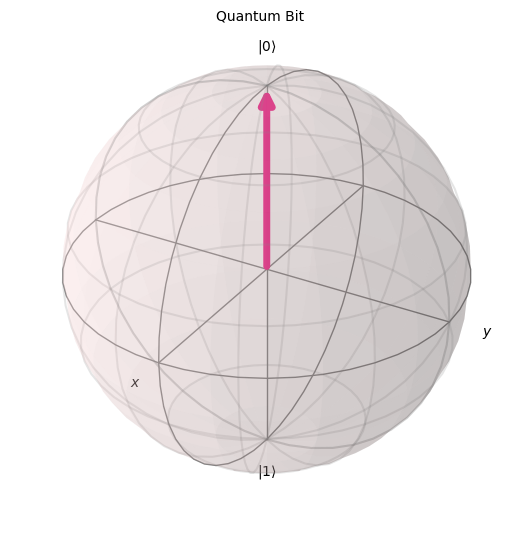

In [3]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1], "Quantum Bit")

### Single Qubit Gates

In Qiskit, qubit a manipulated using quantum gates (Unitary operators) which are operations are similar to logic gates in classical computing. Single qubit gates manipulate individual qubits. Examples include
We have single qubit gates that manipulate the state of individual qubits qubit. Examples include:




| Gate         | Operation                                | Matrix Representation             |
|--------------|------------------------------------------|-----------------------------------|
| Identity (I) | No operation (Leaves qubit unchanged)    | $\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ |
| X (Pauli-X)  | Bit-flip (or NOT)                        | $\begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$ |
| Y (Pauli-Y)  | Bit-flip and phase-flip                 | $\begin{bmatrix}0 & -i \\ i & 0\end{bmatrix}$ |
| Z (Pauli-Z)  | Phase-flip                               | $\begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$ |
| H (Hadamard) | Superposition                            | $\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$ |
| Rx(θ)        | X-axis rotation by angle θ              | $\begin{bmatrix}\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{bmatrix}$ |
| Ry(θ)        | Y-axis rotation by angle θ              | $\begin{bmatrix}\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{bmatrix}$ |
| Rz(θ)        | Z-axis rotation by angle θ              | $\begin{bmatrix}e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}}\end{bmatrix}$ |



These operations can all be seen as rotations on the Qubit. As such the X, Y and Z gates are rotations around the X-, Y- and Z- axis by 180 degrees (or $\pi$ in Radian).

So, after we apply an X-gate or an Y-gate to a qubit in state $|0\rangle$ the qubit will be in state $|1\rangle$

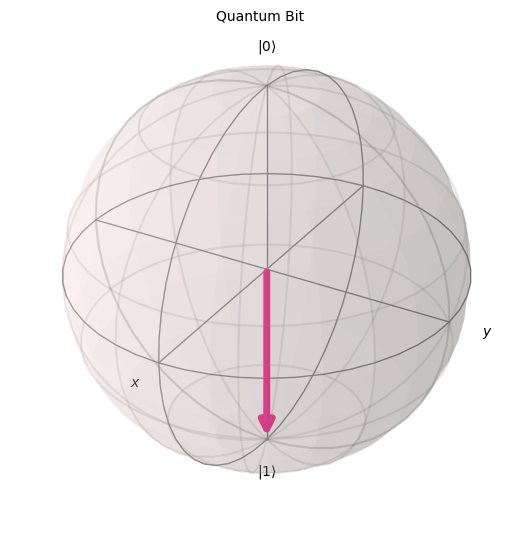

In [4]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,-1], "Quantum Bit")

A Hadamard gate can be used to bring a qubit into superposition which was mentioned above. If we apply a Hadamard gate to a qubit which is in state $|0\rangle$ or in state $|1\rangle$ we will get a qubit in a state $\alpha|0\rangle + \beta|1\rangle$ with $ \alpha = \beta$. This means when this qubit is measured, it will be with equal probability in state $|0\rangle$ or $|1\rangle$.


Here we can see a qubit in the so called $|+\rangle$ state which we get when we apply a Hadamard gate to a qubit in state $|0\rangle$:

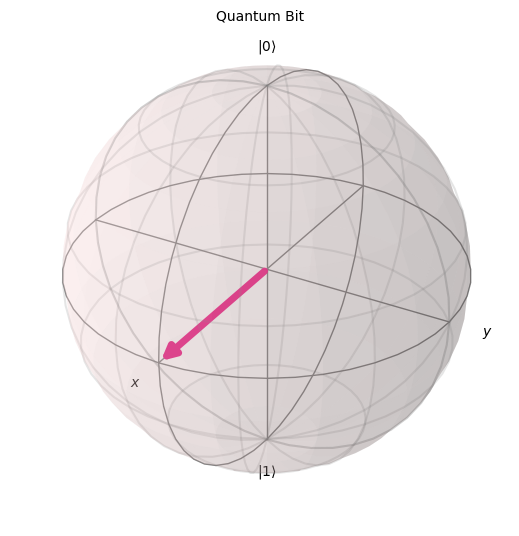

In [5]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,0], "Quantum Bit")

The concept of quantum gates is similar to classical gates like the AND, NOT and OR gates, and as such can also be visualized in a similar manner:


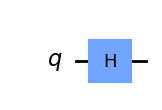

In [6]:
from qiskit import QuantumCircuit 
qc_single = QuantumCircuit(1)
qc_single.h(0)
qc_single.draw("mpl")

### Multi-Qubit Gates

The states of two or more qubits can be correlated in such a way that the state of one qubit instantly influences the state of the other, regardless of distance. This phenomenon is called *Entaglement*. An example of entangled states are the Bell states. Let's have a closer look;

A state given by 

$$ |\psi \rangle = \frac{|00\rangle + |01\rangle}{\sqrt{2}}$$
is non-entangle as it can be represented as a product state.


$$ |\psi \rangle  = |0\rangle \otimes \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |0\rangle|+\rangle$$


while a Bell state (entangled state) given by 

$$ |\Psi^+ \rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}, $$


can not be represented as a product state.

To create entanglement between qubits we need to apply multi-qubit gates.  Multi-qubit gates operate on multiple qubits. An important one is the **CNOT gate** (Controlled-NOT), which flips the second qubit if and only if the first qubit is |1⟩. Other gates that can be used to manipulate entanglement in quantum systems are:

| Gate                   | Operation                                             | Matrix Representation                 |
|------------------------|-------------------------------------------------------|---------------------------------------|
| CNOT (Controlled-X)    | Flips the target qubit if the control qubit is 1     | $\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}$ |
| SWAP                   | Swaps the states of two qubits                       | $\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$ |
| Toffoli (CCNOT)        | Flips the target qubit if both control qubits are 1  | $\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{bmatrix}$ |



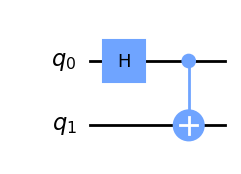

In [7]:
qc_multi = QuantumCircuit(2)
qc_multi.h(0)
qc_multi.cx(0,1)
qc_multi.draw('mpl')

We can construct the Bell state above, by first bringing a Qubit into superposition (by applying a Hadamard gate) and then by applying a CNOT gate with the first qubit as the control to a second qubit. 

From above we know that qubit 0 will be with 50% probability in state $|0\rangle$ and with 50% probability in state $|1\rangle$. 
This means that if qubit 0 is in state $|1\rangle$ then qubit 1 will be flipped and afterwards also be in state $|1\rangle$.


Therefore, the 2 qubits are not only correlated but entangled, so when one of them is measured, the outcome of the other one is also determined.



<h2><a id='qiskit'>  Quantum programming with Qiskit </a></h2>


Qiskit provides a set of tools for quantum programming. The platform allows users to create, manipulate and visualize quantum circuit. 

When using Qiskit a user workflow nominally consists of following four high-level steps:

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

1. Build: Design a quantum circuit(s) that represents the problem you are considering.


In [9]:
# Create a Quantum Circuit acting on the q register
Qbit =QuantumRegister(2)
Cbit = ClassicalRegister(2)
circuit = QuantumCircuit(Qbit, Cbit)

# Add quantum gate onto the qubits
circuit.h(Qbit[0])
circuit.cx(Qbit[0], Qbit[1])

# Map the quantum measurement to the classical bits
circuit.measure_all(Qbit,Cbit)


2. Compile: Compile circuits for a specific quantum service, e.g., a quantum system or classical simulator.


In [10]:
# Compile the circuit for the support instruction set (basis_gates)
# Use Aer's AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)



3. Run: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.


In [11]:
# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()


4. Analyze: Compute summary statistics and visualize the results of the experiments.



Total count for 00 and 11 are: {'00 00': 486, '11 00': 514}


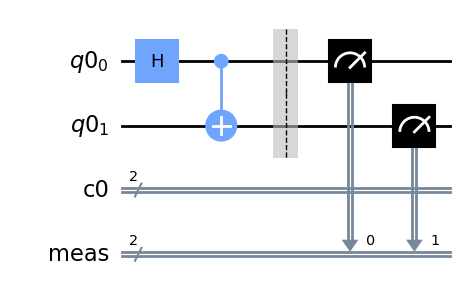

In [12]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw("mpl")

<h2><a id='primitives'> Qiskit Primitives </a></h2>

Primitives allow you to write quantum code for a specific backend without having to explicitly manage some of the finer details. 
Additionally, they provide a seamless way to access the latest optimizations in IBM Quantum hardware and software. Qiskit provides the following 

Here is a list of available Qiskit primitives:
> An Estimator Primitive computes expectation values of observables with respect to states prepared by quantum circuits. 

> A Sampler Primitive calculates probabilities or quasi-probabilities of bitstrings from quantum circuits. Quasi-probabilities are similar to regular probabilities except they may include negative values, which can occur when using certain error mitigation techniques.

### Using the Estimator primitive

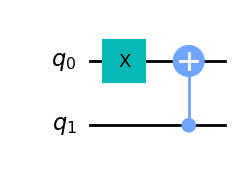

>>> EstimatorResult(values=array([-1.]), metadata=[{}])
  > Expectation value: [-1.]


In [13]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

qc = QuantumCircuit(2)
qc.x(0)
qc.cx(1,0)

display(qc.draw('mpl'))

observable=SparsePauliOp("ZZ")

estimator = Estimator()
job = estimator.run(qc, observable)
result = job.result()

print(f">>> {result}")
print(f"  > Expectation value: {result.values}")


#### Using the Sampler primitive

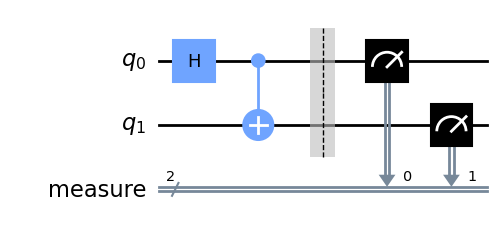

>>> SamplerResult(quasi_dists=[{0: 0.4999999999999999, 3: 0.4999999999999999}], metadata=[{}])
  > Quasi-probability distribution: {'00': 0.4999999999999999, '11': 0.4999999999999999}


In [14]:
from qiskit.primitives import Sampler

qc_multi = QuantumCircuit(2)
qc_multi.h(0)
qc_multi.cx(0,1)

qc_multi.measure_active()
display(qc_multi.draw('mpl'))

#circuit = random_circuit(2, 2, seed=1, measure=True).decompose(reps=1)

sampler = Sampler()
job = sampler.run(qc_multi)
result = job.result()

print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0].binary_probabilities()}")




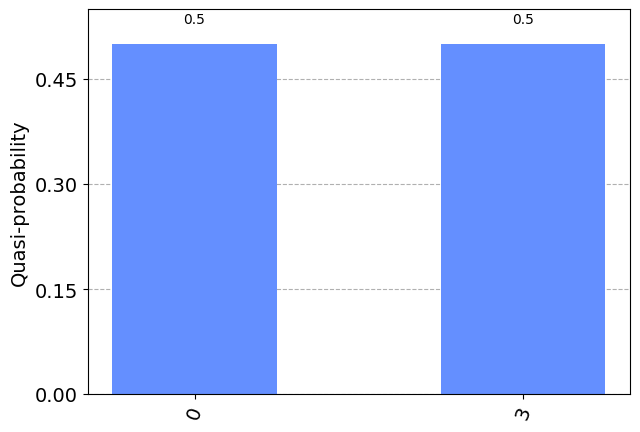

In [15]:
plot_histogram(result.quasi_dists)

****

<h1><a id='hydrogen'> The Hydrogen Molecule and the Hamiltonian </a></h1>

In quantum mechanics, the Hamiltonian operator ($\hat{H}$) represents the total energy of a quantum system. It's fundamental for understanding the behavior of quantum particles. The Hamiltonian operator for a single particle is given by:
\begin{equation}
\hat{H} = T + V(\mathbf{r,t})
\end{equation}
Where $T$ presents the kinetic energy of the system and $V(\mathbf{r,t})$ denotes the potential energy. 

The Hamiltonian operator can be expressed in different formulas depending on the functions in which its being applied. 
In quantum chemistry for example, the Hamiltonian describes the behavior of electrons and nuclei in a molecule.  This Hamiltonian includes terms for kinetic energy of electrons, potential energy due to atomic nuclei, and electron-electron interactions.
For this tutorial we will consider the simplest molecule: *The hydrogen molecule $H_2$*.
    
<img src="H2_nucleus.png"/>

    
A hydrogen molecule contains two protons circled by two electrons. The protons and electrons are held together by electrostatic potential energy. Solving the Hamiltonian that describes the interactions of the protons and electrons helps us understand molecular properties. Let's delve into the molecular and electronic Hamiltonian for a hydrogen molecule.

<h3><a id='molecular_hamiltonian'>Hydrogen ($H_2$) Molecular Hamiltonian</a></h3>

In quantum chemistry, the molecular Hamiltonian describes the behavior of the nuclei and electrons within a molecule. For a hydrogen molecule (H₂), the molecular Hamiltonian can be simplified due to its simplicity as a diatomic molecule.


The total molecular Hamiltonian $ \hat{H}_{\text{molecular}} $ for a hydrogen molecule is the sum of four components: two kinetic and two potential terms.
$$ \hat{H}_{\text{molecular}} = T_{\text{nuclear}} + T_{\text{electronic}} + V_{\text{ne}} + V_{\text{ee}} $$

Each term describes either single- or two-particle interactions, such as between an electron and the nuclei $V_{\text{ne}}$.

1. *Nuclear Kinetic Energy*: This term represents the kinetic energy of the two hydrogen nuclei due to their motion. It is given by the formula:  
   $$ T_{\text{nuclear}} = -\frac{\hbar^2}{2M} \nabla_R^2 $$
   Here, $ M $ is the reduced mass of the two hydrogen nuclei, and $ \nabla_R^2 $ is the Laplacian operator with respect to the nuclear coordinates $ R $.

2. *Electronic Kinetic Energy*: This term represents the kinetic energy of the electrons as they move around the two hydrogen nuclei. It is given by the formula:  
   $$ T_{\text{electronic}} = -\sum_i \frac{\hbar^2}{2m_e} \nabla_i^2 $$
   Here, $ m_e $ is the mass of an electron, $ \nabla_i^2 $ is the Laplacian operator with respect to the electronic coordinates $ r_i $, and the sum is taken over all electrons.

3. *Nuclear-Electronic Potential Energy*: This term accounts for the attractive interaction between the nuclei and the electrons. It is given by Coulomb's law and can be expressed as:  
   $$ V_{\text{ne}} = -\sum_i \frac{Z}{|r_i - R_A|} - \sum_i \frac{Z}{|r_i - R_B|} $$
   Here, $ Z $ is the atomic number of hydrogen, $ R_A $ and $ R_B $ are the nuclear coordinates of the two hydrogen nuclei, and $ r_i $ represents the electronic coordinates.

4. *Electronic-Electronic Potential Energy*: This term accounts for the repulsive interactions between the electrons. It is given by the Coulomb repulsion between all pairs of electrons and is described by the formula:  
   $$ V_{\text{ee}} = \frac{1}{2} \sum_{i \neq j} \frac{1}{|r_i - r_j|} $$

$$ \hat{H}_{\text{molecular}} = -\frac{\hbar^2}{2M} \nabla_R^2  -\sum_i \frac{\hbar^2}{2m_e} \nabla_i^2  -\sum_i \frac{Z}{|r_i - R_A|} - \sum_i \frac{Z}{|r_i - R_B|}  +  \frac{1}{2} \sum_{i \neq j} \frac{1}{|r_i - r_j|}  $$


<h3><a id='electronic_hamiltonian'> Electronic Hamiltonian for a Hydrogen Molecule</a></h3>

To further simplify, we can focus solely on the electronic behavior of the hydrogen molecule by assuming the nuclei are stationary. The electronic Hamiltonian ($ \hat{H}_{\text{electronic}} $) for the hydrogen molecule can be written as:
$$ \hat{H}_{\text{el}} = T_{\text{electronic}} + V_{\text{ne}} + V_{\text{ee}} $$

The total molecular Hamiltonian $ \hat{H}_{\text{molecular}} $ is thus given by
$$ \hat{H}_{\text{el}} = -\sum_i \frac{\hbar^2}{2m_e} \nabla_i^2   -\sum_i \frac{Z}{|r_i - R_A|} - \sum_i \frac{Z}{|r_i - R_B|}  + \frac{1}{2} \sum_{i \neq j} \frac{1}{|r_i - r_j|} .$$



Solving this Hamiltonian using quantum mechanics provides insight into the electronic structure and properties of the hydrogen molecule, and others. While we've provided a simplified overview for a hydrogen molecule, real-world applications involve more complex molecules and computational methods. The study of these Hamiltonians is fundamental in quantum chemistry for understanding molecular behavior and designing new materials and drugs.

<h2><a id='schrodinger'>  The Schrödinger Equation </a></h2> 

The Hamiltonian function generates the time evolution of the quantum states. The Schrödinger equation is a cornerstone of quantum mechanics. It describes how the state of a physical system changes over time and plays a pivotal role in understanding the behavior of particles on the quantum scale, including electrons in molecules. Let's explore the Schrödinger equation and its significance in quantum dynamics.
For a quantum system, the time-dependent Schrödinger equation is:

\begin{equation}
    i\hbar \frac{d |\psi\rangle}{d t} =\hat{ H} |\psi\rangle
\end{equation}

Here:
- $|\psi\rangle$ is the quantum state of the system
- $\hat{H}$ is the Hamiltonian operator
- $\hbar = \frac{h}{2\pi}$ the reduced Planck Constant


Solving the Schrödinger equation using the molecular Hamiltonian operator allows us to determine the energy levels, wave functions (quantum state), and properties of the hydrogen molecule providing insights provide into the its electronic structure, stability, and reactivity. This information is vital for understanding molecular bonding, spectroscopy, and reactivity.


<div align=center class="alert alert-block alert-success">
    <h1><a id='walkthrough'>Walk-through: Calculating the Ground-state Energy for the Simplest Molecule in the Universe</a></h1>
</div>

In [16]:
from qiskit import Aer


from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.drivers import Molecule


from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter

from qiskit_nature.second_q.algorithms  import GroundStateEigensolver
from qiskit.algorithms import NumPyMinimumEigensolver
#from qiskit_nature.algorithms import BOPESSampler

from qiskit.utils import QuantumInstance

from qiskit_nature.second_q.circuit.library import HartreeFock

from qiskit_nature.second_q.circuit.library.ansatzes import UCCSD
from qiskit.circuit.library import TwoLocal

from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA

from qiskit.primitives import Estimator

from functools import partial as apply_variation_to_atom_pair
import numpy as np
import matplotlib.pyplot as plt


from qiskit_nature import settings

settings.use_pauli_sum_op = False


<h2><a id='intro'>Introduction</a></h2>

In this tutorial, we are tasked with investigating whether the toy anti-retroviral molecule binds with and therefore, disrupts the toy protease molecule. Successful binding is determined by a lower total ground-state energy for the molecules when they are close together (forming a single macromolecule) compared to far apart.

Total ground-state energy refers to the sum of the energies concerning the arrangement of the electrons and the nuclei. The nuclear energy is easy to calculate classically. It is the energy of the electron distribution (i.e., molecular spin-orbital occupation) that is extremely difficult and requires a quantum computer.

We start with a walk-through tutorial, where we calculate the ground-state energy of a simple molecule and leave the more complicated set-up to the challenge section.

The ground-state of a molecule in some configuration consists of the locations of the nuclei, together with some distribution of electrons around the nuclei. The nucleus-nucleus, nuclei-electron and electron-electron forces/energy of attraction and repulsion are captured in a matrix called the **Hamiltonian**. Since the nuclei are relatively massive compared to the electrons, they move at a slower timescale than the electrons. This allows us to split the calculation into two parts: placing the nuclei and calculating the electron distribution, followed by moving the nuclei and recalculating the electron distribution until a minimum total energy distribution is reached:

<div class="alert alert-block alert-warning">
<b>Algorithm: Find_total_ground_state</b>

Place nuclei
    
Repeat until grid completed or no change in total_energy:
    
  - calculate electronic ground-state
    
  - total_energy = (nuclei repulsion + electronic energy)
    
  - move nuclei (either in grid or following gradient)

return total_energy
</div>

In the walk-through, we simply fix the nuclei positions; however, later, in the challenge section, we allow for a varying one-dimensional intermolecular distance between the anti-retroviral and the protease molecules, which represents the anti-retroviral approaching the protease molecule in an attempt to bind.

<h2><a id='step_1'>Step 1: Defining the Molecular Geometry</a></h2>

For this walk-through, we work with the simplest non-trivial molecule possible: H$_2$, the hydrogen gas molecule.

<img src="h2.png"/>

*The first thing to do is to fix the location of each nucleus. This is specified as a python list of nuclei, where each nucleus (as a list) contains a string corresponding to the atomic species and its 3D co-ordinates (as another list). We also specify the overall charge, which tells Qiskit to automatically calculate the number of needed electrons to produce that charge:*

In [17]:
hydrogen_molecule = MoleculeInfo(["H", "H"], 
                                 [(0.0, 0.0, 0.0), 
                                  (0.0, 0.0, 0.735)], 
                                 charge=0, 
                                 multiplicity=1)


In [18]:
print(hydrogen_molecule)

Molecule:
	Multiplicity: 1
	Charge: 0
	Unit: Angstrom
	Geometry:
		H	(0.0, 0.0, 0.0)
		H	(0.0, 0.0, 0.735)


<h2><a id='step_2'>Step 2: Calculating the Qubit Hamiltonian</a></h2>

Once nuclei positions are fixed (the nucleus-nucleus forces are temporarily irrelevant), the only part of the Hamiltonian that then needs to be calculated on the quantum computer is the detailed electron-electron interaction. The nuclei-electron and a rough mean field electron-electron interaction can be pre-computed as *allowed molecular orbitals* on a classical computer via the, so called, Hartree-Fock approximation.

#### The Hatree-Fock approximation
The Hatree-Fock (HF) method approximates the N-body problem by N one-body problems where each electron evolves in the mean-field of the others. Looking back at the original full molecular Hamiltonian $ \hat{H}_{\text{molecular}} $, we can see that there are two N-body interaction terms: $\hat{V}_{\text{ee}}$ and $\hat{V}_{\text{ne}}$. We approximate $\hat{V}_{\text{ne}}$ by assuming that the nuclei are much slower than the electrons, and thus can be treated as "stationary" potentials from the perspective of the electrons. The electron-electron interaction is partially precomputed, giving us a mean-field representation of the electrons' behaviors.

To more easily represent this new Hartree-Fock Hamiltonian $\hat{H}_{\text{HF}}$, we re-express the terms of $\hat{H}_{\text{molecular}}$ in the basis of the solutions of the HF method, also called Molecular Orbitals (MOs). This can be seen by the **second-quantized** creation $\hat{a}^\dagger$ and annihilation $\hat{a}$ operators below:

\begin{equation}
H_{ele} = \sum _{pq} h_{pq} a_p ^\dagger a_q +  \frac{1}{2}  \sum _{pqrs} h_{pqrs} a_p ^\dagger a_q^\dagger a_r a_s
\end{equation}

Where $h_{pq}$ is the $1$-body integral defined by 

\begin{equation}
h_{pq} = \int \phi_p (r) \left( -\frac{1}{2} \Delta ^2 - \sum_I \frac{Z_I}{R_I-r} \right) \phi_q(r) dr
\end{equation}

and $h_{pqrs}$ is the $2$-body integral defined by

\begin{equation}
h_{pqrs} = \int \frac{\phi^*_p(r_1)\phi^*_q (r_2) \phi_r(r_2) \phi_s(r_1)}{|r_1-r_2|} dr_1dr_2
\end{equation}
where $p,q,r,s$ are MO indices.
The MOs ($\phi_u$) can be occupied or virtual (unoccupied). One MO can contain 2 electrons. However, in what follows we work with Spin Orbitals which are associated with a spin up ($\alpha$) of spin down ($\beta$) electron. Thus, Spin Orbitals can contain one electron or be unoccupied.



With these allowed molecular orbitals and their pre-calculated overlaps, Qiskit automatically produces an interacting electron-electron **fermionic molecular-orbital Hamiltonian** (called Second Quantization). The molecular orbital and overlap pre-calculation are provided by classical packages, e.g., PySCF, and connected to Qiskit via a so-called *driver*, in particular, we use the PySCFDriver.

<h3><a id='step_3'>Step 2a: Constructing the Fermionic Hamiltonion</a></h3>

*We specify the driver to the classical software package that is to be used to calculate the resulting orbitals of the provided molecule after taking into account the nuclei-electron and mean-field interactions. The `basis` option selects the basis set in which the molecular orbitals are to be expanded in. `sto3g` is the smallest available basis set:*

In [19]:
molecular_hydrogen_orbital_maker = PySCFDriver.from_molecule(hydrogen_molecule, basis="sto3g")


*Running the PySCFDriver, will yield an ElectronicStructureProblem, this gives a representation of the electronic structure problem which we are interested in solving.*

In [20]:
hydrogen_fermionic_hamiltonian = molecular_hydrogen_orbital_maker.run()

*Here, we instruct the ElectronicStructureProblem object to go ahead and create the fermionic molecular-orbital Hamiltonian (which gets stored internally):*

In [21]:
hamiltonian = hydrogen_fermionic_hamiltonian.hamiltonian.second_q_op()
print("Completed running classical package.\nFermionic molecular-orbital Hamiltonian calculated and stored internally.")
print("An example of HF info available: Orbital Energies", hydrogen_fermionic_hamiltonian.orbital_energies)

Completed running classical package.
Fermionic molecular-orbital Hamiltonian calculated and stored internally.
An example of HF info available: Orbital Energies [-0.58062892  0.67633625]


(If this step is not run explicitly, and its outputs are not used in an intermediary step, the final ground_state solving step would run it automatically.)

<h3><a id='step_2b'>Step 2b: Getting Ready to Convert to a Qubit Hamiltonian</a></h3>

Above, *fermionic* is a term to describe the behaviour of electrons (having an anti-symmetric wave-function obeying the Pauli Exclusion principle). In order to use the quantum computer we need to map the electrons (which exhibit fermionic behavior) to the quantum computer's qubits (which have closely related spin behaviour: Pauli Exclusion but not necessarily anti-symmetric). This mapping is a generic process, independent of the driver above.

There are multiple mapping methods available, each with pros and cons, and constitutes something to experiment with. We will select one of the simplest mapping methods, using the [Jordan-Wigner transformation](https://en.wikipedia.org/wiki/Jordan%E2%80%93Wigner_transformation), which converts between Fermionic operators (e.g., $\hat{a}^\dagger$ and $\hat{a}$) and spin operators (e.g., $\hat{S}^x$), which are closely related to qubit operators (e.g., $\hat{\sigma}_x$). Applying this mapping to our Hamiltonian $\hat{H}_{\text{HF}}$ allows us to run it on a quantum computer. If you want to see more about this mapping process for the hydrogen molecule, have a look at [this video](https://www.youtube.com/watch?v=AZQDCWX_aqA) from the Qiskit Global Summer School. You can also find more examples of mappings [here.](https://qiskit.org/ecosystem/nature/tutorials/06_qubit_mappers.html)

In [22]:
map_fermions_to_qubits = JordanWignerMapper()
# e.g. alternative:
# map_fermions_to_qubits = BravyiKitaevMapper()

(Note, we have just chosen the mapper above, it has not yet been applied to the fermionic Hamiltonian.)

<h2><a id='step_3'>Step 3: Setting up the Variational Quantum Eigensolver (VQE)</a></h2>


### Overview of Variational Algorithms

Variational algorithms intertwine the power of quantum systems with classical optimization techniques. These algorithms are designed to find the optimal solution of a problem by iteratively adjusting a set of parameters within a quantum circuit. Variational algorithms are composed of modular components that can be optimized based on advancements in algorithms, software, and hardware.
 The main components of Variational Algorithms are:
- *Cost Function:* Describes a specific problem with a set of parameters. It's evaluated using quantum resources.
- *Ansatz:* Defines the search space using parametrized states. An ansatz is a combination of a reference state and a variational form (parametrized quantum circuit).
- *Optimizer:* Iteratively explores the search space by evaluating the cost function with current parameters and selecting the next iteration's parameters until convergence is achieved.

The cost functions are evaluated using quantum resources, while optimization is performed using classical methods (Hybrid nature). 

- **Algorithm Workflow:**
    1. **Initialize Problem:** Quantum computer starts in a default state $|0\rangle$ and is transformed into a reference state $|\rho\rangle$ using a unitary reference operator $U_R$.
    $$ U_R|0\rangle = |\rho \rangle $$
    2. **Prepare Ansatz:** A variational form $U_V(\theta)$, consisting of parametrized states, is defined to explore the space between the reference state and the desired target state. The combination of the reference state and the variational form form the *ansatz* 
    
    $$ U_V(\theta) |\rho \rangle = |\psi (\theta) \rangle $$
    
    The ansatz is crucial as it defines the path between the reference state and the target state. It's a parametrized quantum circuit capable of transforming the default state to the desired solution state. Different ansätze can be explored to find the best-suited transformation for a specific problem.

    3. **Evaluate Cost Function:** The problem is encoded as a cost function $C(\theta)$, often represented as a linear combination of Pauli operators, which is evaluated on the quantum system. Qiskit Runtime primitives can be used to address noise and errors during this step.
    
    4. **Optimize Parameters:** Evaluation results are sent to a classical computer where a classical optimizer analyzes them. The optimizer selects the next set of variational parameter values to move towards convergence. For the optimization task, we use available classical optimization methods such as the  Simultaneous Perturbation Stochastic Approximation (SPSA) optimizer and the Constrained Optimization By Linear Approximation (COBYLA) optimizer, both available in Qiskit. To help can help our optimizer converge on a solution faster, we use the *boostrapping* optimization technique. In Bootstrapping optimization, we use known reference solutions as initial parameters for the initial state. 
    
    An initial optimal solution can be used to expedite the optimization process. The ansatz parameters are updated based on the results of the classical optimizer. The entire process is repeated until the convergence criteria are met. Once the optimization is complete, an optimal set of parameter values is obtained. The proposed solution state for the problem is the final outcome.


*Hybrid Approach:*
-Variational algorithms leverage both quantum and classical resources.
- Quantum resources are used for evaluating the cost function and exploring the search space.
- Classical resources are used for optimization and analysis of results.



#### Variational Quantum Eigensolver

One example of variational algorithms is the Variational Quantum Eigensolver (VQE).   

<img src="vqe_method_NB.png"/>

VQE is an algorithm for finding the ground-state of a molecule (or any Hamiltonian in general). It is a hybrid quantum-classical algorithm, which means that the algorithm consists of two interacting stages, a quantum stage and a classical stage. 

During the quantum stage, a trial molecular state is created on the quantum computer. The trial state is specified by a collection of **parameters** which are provided and adjusted by the classical stage. After the trial state is created, its energy is calculated on the quantum computer (by a few rounds of quantum-classical measurements). The result is finally available classically. 

At this stage, a classical optimization algorithm looks at the previous energy levels and the new energy level and decides how to adjust the trial state parameters. This process repeats until the energy essentially stops decreasing. The output of the whole algorithm is the final set of parameters that produced the winning approximation to the ground-state and its energy level.  

<img src="instances_VQE.png"/>

We will use VQE to compute the ground state of the Hydrogen molecule. This algorithm is suitable for current day, noisy **depth**-restricted quantum computers, because it is a hybrid quantum-classical method with short-depth quantum circuits.  Furthermore, VQE offers many opportunities to tweak its configuration; thus, as an end-user you gain experience in quantum black-box tweaking.

<h3><a id='step_3a'>Step 3a: The V in VQE (i.e. the Variational form, a Trial state)</a></h3>

VQE works by 'searching' for the electron orbital occupation distribution with the lowest energy, called the ground-state. The quantum computer is repeatedly used to calculate the energy of the search trial state.

The trial state is specified by a collection of (randomly initialized) parameters that move the state around, in our search for the ground-state (we're minimizing the energy cost-function). The form of the 'movement' is something that can be tweaked (i.e., the definition of the structure of the *ansatz*/trial). There are two broad approaches we could follow. The first, let's call it *Chemistry-Inspired Trial-states*, is to use domain knowledge of what we expect the ground-state to look like from a chemistry point of view and build that into our trial state. The second, let's call it *Hardware-Inspired Trial-states*, is to simply try and create trial states that have as wide a reach as possible while taking into account the architecture of the available quantum computers.

#### *Chemistry-Inspired Trial-states*

Since chemistry gives us domain-specific prior information (e.g., the number of orbitals and electrons and the actual Hartree-Fock approximation), it makes sense to guide the trial state by baking this knowledge into the form of the trial.

*From the HF approximation we get the number of orbitals and from that we can calculate the number of spin orbitals:*

In [23]:
num_hydrogen_spin_orbitals = hydrogen_fermionic_hamiltonian.num_spin_orbitals

*Furthermore, we can also extract the number of electrons (spin up and spin down):*

In [24]:
num_hydrogen_electrons_spin_up_spin_down = (hydrogen_fermionic_hamiltonian.num_alpha, hydrogen_fermionic_hamiltonian.num_beta)


*With the number of spin orbitals, the number of electrons able to fill them and the mapping from fermions to qubits, we can construct an initial quantum computing state for our trial state: 
Due to its complexity, computational methods like Hartree-Fock method are employed to approximate the ground-state electronic wave function of a molecule. The HF method assumes that each electron moves independently in an average field created by all other electrons, effectively neglecting electron-electron correlation. 

The Hartree-Fock method seeks to find a set of spatial orbitals (one for each electron) that minimize the total energy of the system while obeying the Pauli exclusion principle. These orbitals are approximated as a single Slater determinant formed from a set of molecular orbitals (MOs), which are linear combinations of atomic orbitals (AOs).

In [25]:
hydrogen_initial_state = HartreeFock(hydrogen_fermionic_hamiltonian.num_spatial_orbitals,
                                     hydrogen_fermionic_hamiltonian.num_particles,
                                     qubit_mapper = map_fermions_to_qubits)

*Finally, Qiskit provides a Class (Unitary Coupled Cluster Single and Double excitations, `UCCSD`) that takes the above information and creates a parameterised state inspired by the HF approximation, that can be iteratively adjusted in our attempt to find the ground-state:*



In [26]:
hydrogen_chemistry_inspired_trial = UCCSD(hydrogen_fermionic_hamiltonian.num_spatial_orbitals,
                                          hydrogen_fermionic_hamiltonian.num_particles,
                                          qubit_mapper = map_fermions_to_qubits,
                                          initial_state=hydrogen_initial_state)

#### *Hardware-Inspired Trial-states*

The problem with the above "chemistry-inspired" trial-states, is that they are quite deep, quickly using up the available depth of current-day quantum computers. A potential solution is to forgo this chemistry knowledge and try to represent arbitrary states with trial states that are easy to prepare and parametrically "move" around on current hardware. There are two quantum operations that can be used to try and reach arbitrary states: mixing (our term for *conditional sub-space rotation*) and rotating (*unconditional rotation*). Detailed knowledge of how these operations and their sub-options work are not really needed, especially because it is not immediately obvious which settings produce the best results.

##### Mixing (also called Entanglement maps)

There are a set of available mixing strategies, that you may experiment with. This is specified with two arguments, *`entanglement`* (choosing what to mix) and *`entanglement_blocks`* (choosing how to mix):

Possible *`entanglement`* values: `'linear'`, `'full'`, `'circular'`, `'sca'`

Possible *`entanglement_blocks`* values: `'cz'`, `'cx'`

For our purposes, it is acceptable to simply choose the first option for each setting.
  
##### Rotation

There are a set of available *parameterized* rotation strategies. The rotation strategies are specified as a single argument, *`rotation_blocks`*, in the form of a list of any combination of the following possibilities:

Possible *`rotation_blocks`*: `'ry'`, `'rx'`,`'rz'`,`'h'`, ...

Typically, this is the only place that parameters are introduced in the trial state. One parameter is introduced for every rotation, corresponding to the angle of rotation around the associated axis. (Note, `'h'` does not have any parameters and so can not be selected alone.)

Again, for our purposes, an acceptable choice is the first option alone in the list.

*Qiskit provides a Class called `TwoLocal` for creating random trial states by local operations only. The number of **rounds** of the local operations is specified by the argument `reps`:*

In [27]:
hardware_inspired_trial = TwoLocal(rotation_blocks = ['ry'], entanglement_blocks = 'cz',
                                   entanglement='linear', reps=2)

(Note, this trial state does not depend on the molecule.)

*Just for convenience, let's choose between the two approaches by assiging the choice to a variable:*

In [28]:
hydrogen_trial_state = hydrogen_chemistry_inspired_trial
# OR
#hydrogen_trial_state = hardware_inspired_trial

<h3><a id='step_3b'>Step 3b: The Q in VQE: the Quantum environment</a></h3>

Since VQE runs on a quantum computer, it needs information about this stage. For testing purposes, this can even be a simulation, both in the form of noise-free or noisy simulations. Ultimately, we would want to run VQE an actual (albeit noisy) quantum hardware and hopefully, in the not-too-distant future, achieve results unattainable classically. For this challenge, let us pursue noise-free simulation only.

#### Noise-Free Simulation

We will be using a Qiskit Aer which provides high-performance quantum computing simulators with realistic noise models. 

It provides interfaces to run quantum circuits with or without noise using multiple different simulation methods. 

In this case we will be using a noise free simulator as mentioned, a so called [statevector simulator](https://qiskit.org/ecosystem/aer/stubs/qiskit_aer.StatevectorSimulator.html)


*To set up a noise-free simulation we can call the following:*



In [29]:
noise_free_quantum_environment = Aer.get_backend('statevector_simulator')
noise_free_quantum_environment

StatevectorSimulator('statevector_simulator')

<h3><a id='step_3c'>Step 3c: Initializing VQE</a></h3>

Qiskit Nature provides a class called VQE, that implements the VQE algorithm. *It is initialized in a generic way (without reference to the molecule or the Hamiltonian) and requires the two pieces of information from above: the trial state and the quantum environment:*



***
Estimator class estimates expectation values of quantum circuits and observables.. The run() can be used to submit circuits, observables, and parameters to the Estimator primitive.

In [30]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
estimator = Estimator()

optimizers = COBYLA(maxiter=80)

hydrogen_vqe_solver = VQE(estimator=estimator, ansatz=hydrogen_trial_state, optimizer=optimizers )

(Note, the vqe solver is only tailored to hydrogen if the trial state is the hydrogen_chemistry_inspired_trial.)

<h2><a id='step_4'>Step 4: Solving for the Ground-state</a></h4>

**Qiskit Nature provides a class called GroundStateEigensolver to calculate the ground-state of a molecule.**

This class first gets initialized with information that is independent of any molecule. It can then be applied to specific molecules using the same generic setup.

To initialize a GroundStateEigensolver object, we need to provide the two generic algorithmic sub-components from above, the mapping method (Step 2b) and the solving method (Step 3). For testing purposes, an alternative to the VQE solver is a classical solver (see numpy_solver below).

In [31]:
hydrogen_ground_state = GroundStateEigensolver(map_fermions_to_qubits, hydrogen_vqe_solver)

We are finally ready to solve for the ground-state energy of our molecule.

We apply the GroundStateEigensolver to the fermionic Hamiltonian (Step 2a) which has encoded in it the molecule (Step 1). The already specified mapper and VQE solver is then automatically applied for us to produce the ground-state (approximation).



In [32]:
hydrogen_ground_state_info = hydrogen_ground_state.solve(hydrogen_fermionic_hamiltonian)

print(hydrogen_ground_state_info)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275026849
  - computed part:      -1.857275026849
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.1373060324
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38881679705]
    - computed part:      [0.0  0.0  1.38881679705]
  > Dipole moment (a.u.): [0.0  0.0  0.00013190295]  Total: 0.00013190295
                 (debye): [0.0  0.0  0.000335263825]  Total: 0.000335263825
 


As you can see, we have calculated the Ground-state energy of the electron distribution: -1.85 Hartree

From the placement of the nuclei, we are also conveniently given the repulsion energy (a simple classical calculation).

Finally, when it comes to the ground-state of the overall molecule it is the total ground state energy that we are trying to minimize.

So, the next step would be to move the nuclei and recalculate the **total ground state energy** in search of the stable nuclei positions.

To end our discussion, let us compare the quantum-calculated energy to an accuracy-equivalent (but slower) classical calculation.

In [33]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

#Alternative Step 3b
numpy_solver = NumPyMinimumEigensolver()

#Alternative Step 4
ground_state_classical = GroundStateEigensolver(map_fermions_to_qubits, numpy_solver)
hydrogen_ground_state_info_classical = ground_state_classical.solve(hydrogen_fermionic_hamiltonian)

hydrogen_energy_classical = hydrogen_ground_state_info.computed_energies[0]
print("Ground-state electronic energy (via classical calculations): ", hydrogen_energy_classical, "Hartree")

Ground-state electronic energy (via classical calculations):  -1.8572750268492035 Hartree


The agreement to so many decimal places tells us that, for this particular Hamiltonian, the VQE process is accurately finding the lowest eigenvalue (and interestingly, the ansatz/trial does not fail to capture the ground-state, probably because it spans the entire Hilbert space). However, when comparing to nature or very accurate classical simulations of $H_2$, we find that the energy is only accurate to two decimal places, e.g., total energy VQE: -1.137 Hartree vs highly accurate classical simulation: -1.166 Hartree, which only agrees two decimal places. The reason for this is that in our above treatment there are sources of modelling error including: the placement of nuclei and a number of approximations that come with the Hartree-Fock expansion. For $H_2$ these can be addressed, but ultimately, in general, the trickier of these sources can never be fully handled because finding the perfect ground-state is QMA-complete, i.e. the quantum version of NP-complete (i.e. 'unsolvable' for certain Hamiltonians). Then again, nature itself is not expected to be finding this perfect ground-state, so future experimentation is needed to see how close a given quantum computing solution approximates nature's solution.

<div align=center class="alert alert-block alert-success">
<h1>Walk-through Finished</h1>
</div>

<div align=center class="alert alert-block alert-success">
    <h1><a id='challenge'>Micromolecule</a></h1>
</div>


<h2><a id='preface'>Preface</a></h2>

**HIV is a virus that has presented an immense challenge for public health, globally**. The ensuing disease dynamics touch on multiple societal dimensions including nutrition, access to health, education and research funding. To compound the difficulties, the virus mutates rapidly with different strains having different geographic footprints. In particular, the HIV-1-C and HIV-2 strains predominate mostly in Africa. Due to disparities in funding, research for treatments of the African strains lags behind other programmes. African researchers are striving to address this imbalance and should consider adding the latest technologies such as quantum computing to their toolkits.


**Quantum computing promises spectacular improvements in drug-design**. In particular, in order to design new anti-retrovirals it is important to perform **chemical simulations** to confirm that the anti-retroviral binds with the virus protein. Such simulations are notoriously hard and sometimes ineffective on classical supercomputers. Quantum computers promise more accurate simulations allowing for a better drug-design workflow.

In detail: anti-retrovirals are drugs that bind with and block a virus protein, called protease, that cleaves virus polyproteins into smaller proteins, ready for packaging. The protease can be thought of as a chemical scissor. The anti-retroviral can be thought of as a sticky obstacle that disrupts the ability of the scissor to cut. With the protease blocked, the virus cannot make more copies of itself.

Mutations in the viral protease changes the binding propensity of a given anti-retroviral. Hence, when a mutation occurs and an anti-retroviral no longer binds well, the goal becomes to adjust the anti-retroviral molecule to again bind strongly.

**The main goal of this notebook is to explore whether a toy anti-retroviral molecule binds with a toy virus protease.**

Along the way, this notebook introduces **state-of-the-art hybrid classical-quantum embedded chemistry modelling** allowing the splitting of the work-load between classical approximations and more accurate quantum calculations.

Finally, you need to tweak the setup of the quantum chemistry algorithm (without having to understand the nuts and bolts of quantum computing) to achieve the best performance for ideal quantum computing conditions.

*A video explaining how HIV infects and how anti-retroviral treatment works*:

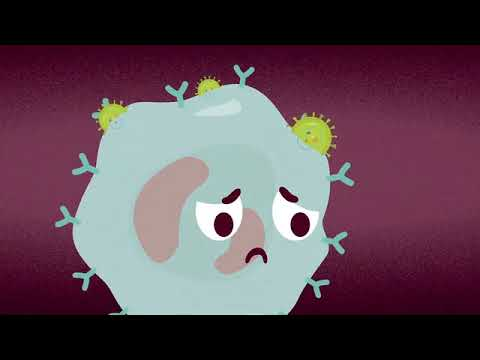

In [34]:
from IPython.display import display, YouTubeVideo
YouTubeVideo('cSNaBui2IM8')

## Specifying the Protease+Anti-retroviral Macromolecule

### Protease
A real protease molecule is made up of two polypeptide chains of around one hundred amino-acids in each chain (the two chains are folded together), with neighbouring pairs connected by the so-called *peptide-bond*.

<img src="peptide_bond_wikipedia.png" title="Amino Acid bonding"/>

For our toy protease molecule, we have decided to take inspiration from this peptide bond since it is the basic building structure holding successive amino acids in proteins together. It is one of the most important factors in determining the chemistry of proteins, including protein folding in general and the HIV protease's cleaving ability, in particular.

To simplify the calculations, let us choose to focus on the O=C-N part of molecule. We keep and also add enough hydrogen atoms to try and make the molecule as realistic as possible (indeed, HCONH$_2$, Formamide, is a stable molecule, which, incidentally, is an ionic solvent, so it does "cut" ionic bonds).

Making O=C-N our toy protease molecule is an extreme simplification, but nevertheless biologically motivated.


Here is our toy protease:

<img width=50% src="protease.png"/>

```
"O":  (1.1280, 0.2091, 0.0000)
"N": (-1.1878, 0.1791, 0.0000)
"C": (0.0598, -0.3882, 0.0000)
"H": (-1.3085, 1.1864, 0.0001)
"H": (-2.0305, -0.3861, -0.0001)
"H": (-0.0014, -1.4883, -0.0001)
```

Just for fun, you may imagine that this molecule is a pair of scissors, ready to cut the HIV master protein (Gag-Pol polyprotein), in the process of making copies of the HI virus:

<img width=30% src="carpet_scissors_wikipedia_cropped.png"/>

### Anti-retroviral
The anti-retroviral is a molecule that binds with the protease to **inhibit/block the cleaving mechanism**. For this challenge, we select a single carbon atom to be our stand-in for the anti-retroviral molecule.

<img width=10% src="arv.png"/>

### Macromolecule
Even though the two molecules are separate in our minds, when they approach, they form a single macro-molecule, with the outer-electrons forming molecular orbitals around all the atoms.

As explained in the walk-through, the quantum electronic distribution is calculated for fixed atom positions, thus we have to separately place the atoms. For the first and second task, let us fix the protease's co-ordinates and only vary the anti-retroviral's position along a straight line.

We arbitrarily select a line of approach passing through a given point and approaching the nitrogen atom. This "blocking" approach tries to obstruct the scissor from cutting. If it "sticks", it's working and successfully disrupts the duplication efforts of the HIV.



<h2><a id='exercise_3a'>Exercise 3a: Molecular Definition of Macromolecule with Blocking Approach</a></h2>

Construct the molecular definition and molecular variation to represent the anti-retroviral approaching the nitrogen atom, between the "blades":
<img width=50% src="arv_approaches_protease.png"/>
 ```
 "C": (-0.1805, 1.3955, 0.0000)
 ```

## Write your answer code here:

Create a your molecule in the cell below. Make sure to name the molecule `macromolecule`.

In [35]:
macromolecule = MoleculeInfo( symbols =['O','N','C','H','H','H','C'],
                         coords=[(1.1280, 0.2091, 0.0000),
                          (-1.1878, 0.1791, 0.0000),
                          (0.0598, -0.3882, 0.0000),
                          (-1.3085, 1.1864, 0.0001),
                          (-2.0305, -0.3861, -0.0001),
                          (-0.0014, -1.4883, -0.0001),
                          (-0.1805, 1.3955, 0.0000)],
                         charge=0, multiplicity=1)                   

In [36]:
print(macromolecule)

Molecule:
	Multiplicity: 1
	Charge: 0
	Unit: Angstrom
	Geometry:
		O	(1.128, 0.2091, 0.0)
		N	(-1.1878, 0.1791, 0.0)
		C	(0.0598, -0.3882, 0.0)
		H	(-1.3085, 1.1864, 0.0001)
		H	(-2.0305, -0.3861, -0.0001)
		H	(-0.0014, -1.4883, -0.0001)
		C	(-0.1805, 1.3955, 0.0)


<h2><a id='refine_step_2'>2. Refining Step 2: Reducing the quantum workload</a></h2>

In Step 2, we constructed the qubit Hamiltonian. If we tried to apply Step 2 and beyond to our macromolecule above, the ground state calculation simulation would fail. The reason is because since we specified a zero charge, Qiskit knows that it must work with 30 (= 2\*6+7+8+3\*1) electrons. After second quantization, this translates into, say, 60 spin-orbitals which requires 60 qubits. 60 qubits is beyond our ability to simulate classically and while there are IBM Quantum systems with more than 60 qubits available, the noise levels are currently too high to produce accurate results when using that many qubits. Thus, for the purpose of this Challenge we need to reduce the number of qubits. Fortunately, this is well-motivated from a chemistry point of view as well: the classical Hartree-Fock approximation for core-electrons is sometimes sufficient to obtain accurate chemical results. Doubly fortunately, Qiskit has just recently been extended to seamlessly allow for users to specify that certain electrons should receive quantum-computing treatment while the remaining electrons should be classically approximated. Even as more qubits come on online, this facility may prove very useful in allowing near-term quantum computers to tackle very large molecules that would otherwise be out of reach.

*Therefore, we next demonstrate how to instruct Qiskit to give a certain number of electrons quantum-computing treatment:*

In [37]:
macro_molecular_orbital_maker = PySCFDriver.from_molecule(macromolecule)
#split_into_classical_and_quantum = ActiveSpaceTransformer(num_electrons=2, num_molecular_orbitals=2)
#macro_fermionic_hamiltonian = ElectronicStructureProblem(macro_molecular_orbital_maker, [split_into_classical_and_quantum])

In [38]:
macro_molecular_orbital_maker = PySCFDriver.from_molecule(macromolecule)
split_into_classical_and_quantum = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=2)


macromolecule_fermionic_hamiltonian = macro_molecular_orbital_maker.run()
macromolecule_fermionic_op = macromolecule_fermionic_hamiltonian.hamiltonian.second_q_op()

macro_fermionic_hamiltonian = ElectronicStructureProblem(macromolecule_fermionic_op)

In [39]:
macromolecule_fermionic_hamiltonian.orbital_energies

array([-20.35930577, -15.41077813, -11.22759582, -10.80807473,
        -1.42392396,  -1.24345328,  -0.88540017,  -0.80534594,
        -0.6969186 ,  -0.58871275,  -0.5838878 ,  -0.48119217,
        -0.38601417,  -0.29046635,  -0.13621725,   0.25163269,
         0.33266153,   0.40358876,   0.59807611,   0.67686945,
         0.75360879,   0.84997738,   1.0002775 ])

Above, Qiskit provides a class called **ActiveSpaceTransformer** that takes in two arguments. The first is the number of electrons that should receive quantum-computing treatment (selected from the outermost electrons, counting inwards). The second is the number of orbitals to allow those electrons to roam over (around the so-called Fermi level). It is the second number that determines how many qubits are needed.

<h2><a id='exercise_3b'>Exercise 3b: Classical-Quantum Treatment Conceptual Questions (Multiple-Choice)</a></h2>

Q1: Why does giving quantum treatment to outer electrons of the macromolecule first, make more heuristic sense?

```
A: Outer electrons have higher binding energies and therefore swing the ground state energy more, therefore requiring quantum treatment.
B: Outer electrons exhibit more quantum interference because their orbitals are more spread out.
C: Inner core-electrons typically occupy orbitals more straightforwardly, because they mostly orbit a single nucleus and therefore do not lower the energy much by interacting/entangling with outer electrons.
```

Q2: For a fixed number of quantum-treatment electrons, as you increase the number of orbitals that those electrons roam over (have access to), does the calculated ground-state energy approach the asymptotic energy from above or below?

```
A: The asymptotic energy is approached from above, because as you increase the possible orbitals that the electrons have access to, the lower the ground state could be.
B: The asymptotic energy is approached from below, because as you increase the possible orbitals the more accurate is your simulation, adding energy that was left out before.
C: The asymptotic energy is approached from below, because as you increase the possible orbitals that the electrons have access to, the lower the ground state could be.
D: The asymptotic energy is approached from above, because as you increase the possible orbitals the more accurate is your simulation, adding energy that was left out before.
```

**Uncomment your answers to these multiple choice questions in the code-cell below. Run the cell to submit your answers.**

In [40]:
## Q1
# answer_for_ex3b_q1 = 'A'
# answer_for_ex3b_q1 = 'B'
# answer_for_ex3b_q1 = 'C'
##
answer_for_ex3b_q1 = ''
## Q2
# answer_for_ex3b_q2 = 'A'
# answer_for_ex3b_q2 = 'B'
# answer_for_ex3b_q2 = 'C'
# answer_for_ex3b_q2 = 'D'
##
answer_for_ex3b_q2 = ''



----------------

#### <a id='qresource'>Quantum Chemistry Resources</a>
*tutorials*
- https://qiskit.org/documentation/tutorials.html (Getting started with Qiskit)
- https://qiskit.org/ecosystem/nature/tutorials/index.html \
- https://learn.qiskit.org/course/algorithm-design/optimization (Optimization loops)\
- https://learning.quantum-computing.ibm.com/tutorial/variational-quantum-eigensolver-using-estimator-primitive-and-sessions (VQE and Estimate)
- https://qiskit.org/ecosystem/nature/tutorials/11_quadratic_hamiltonian_and_slater_determinants.html (Slater Determinants)

*videos*
https://www.youtube.com/watch?v=Z-A6G0WVI9w (VQE)

*More Reading material*
- https://www.degruyter.com/document/doi/10.1515/phys-2021-0071/html?lang=en

Licensing and notes:
- All images used, with gratitude, are listed below with their respective licenses:
  - https://de.wikipedia.org/wiki/Datei:Teppichschere.jpg by CrazyD is licensed under CC BY-SA 3.0
  - https://commons.wikimedia.org/wiki/File:The_structure_of_the_immature_HIV-1_capsid_in_intact_virus_particles.png by MarinaVladivostok is licensed under CC0 1.0
  - https://commons.wikimedia.org/wiki/File:Peptidformationball.svg by YassineMrabet is licensed under the public domain
  - The remaining images are either IBM-owned, or hand-generated by the authors of this notebook.

- HCONH2 (Formamide) co-ordinates kindly provided by the National Library of Medicine:
  - `National Center for Biotechnology Information (2021). PubChem Compound Summary for CID 713, Formamide. https://pubchem.ncbi.nlm.nih.gov/compound/Formamide.`
- For further information about the Pauli exclusion principle:
https://en.wikipedia.org/wiki/Pauli_exclusion_principle
- We would like to thank collaborators, Prof Yasien and Prof Munro from Wits for extensive assistance.
- We would like to thank all the testers and feedback providers for their valuable input.


In [41]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright